In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(198611, 8)
(278858, 3)
(1149780, 3)


In [7]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,1


In [8]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [9]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
print(books.nunique())

ISBN                   198611
Book-Title             178264
Book-Author             76984
Year-Of-Publication       105
Publisher               13142
Image-URL-S            198434
Image-URL-M            198434
Image-URL-L            198433
dtype: int64


In [14]:
print(users.nunique())

User-ID     278858
Location     57339
Age            165
dtype: int64


In [15]:
print(ratings.nunique())

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


In [16]:
print(books.info())
print(ratings.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198611 entries, 0 to 198610
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 198611 non-null  object
 1   Book-Title           198611 non-null  object
 2   Book-Author          198609 non-null  object
 3   Year-Of-Publication  198611 non-null  int64 
 4   Publisher            198609 non-null  object
 5   Image-URL-S          198611 non-null  object
 6   Image-URL-M          198611 non-null  object
 7   Image-URL-L          198610 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes:

In [17]:
if books['Publisher'].dtype == 'float64' or books['Publisher'].dtype == 'float32':
    print("The 'Publisher' column contains float values.")
else:
    print("The 'Publisher' column does not contain float values.")

The 'Publisher' column does not contain float values.


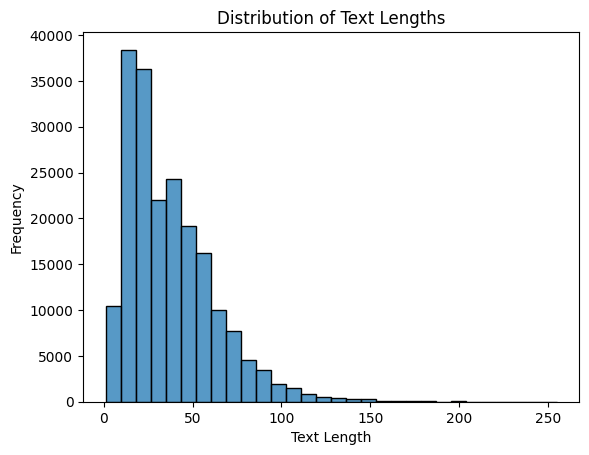

In [18]:
books['text_length'] = books['Book-Title'].apply(len)

import seaborn as sns

sns.histplot(books['text_length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


In [19]:
books[books['Book-Title'].apply(len)>100].iloc[22,1]

'Frankenstein: Complete, Authoritative Text With Biographical, Historical, and Cultural Contexts, Critical History, and Essays from Contemporary Critic ... tive (Case Studies in Contemporary Criticism)'

In [20]:
from collections import Counter

word_counts = Counter(" ".join(books['Book-Title']).split())
print(word_counts.most_common(10))  # Top 10 most frequent words


[('The', 47528), ('of', 43103), ('the', 36021), ('and', 22996), ('A', 20847), ('to', 13626), ('in', 11284), (':', 10055), ('a', 8331), ('for', 8285)]


In [21]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
# X = vectorizer.fit_transform(books['Book-Title'])
# bigrams = vectorizer.get_feature_names_out()

# # Convert to DataFrame
# bigram_df = pd.DataFrame(X.toarray(), columns=bigrams)
# print(bigram_df.sum().sort_values(ascending=False).head(10))  # Top 10 bigrams


## Popularity based recommendation system

In [22]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [23]:
ratings_with_name.shape

(944632, 11)

In [24]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Apple Magic (The Collector's series),1
2,Beyond IBM: Leadership Marketing and Finance ...,1
3,Dark Justice,1
4,Deceived,2
...,...,...
178138,Ã?Â?berraschung am Valentinstag.,2
178139,Ã?Â?lpiraten.,2
178140,Ã?Â?rger mit Produkt X. Roman.,4
178141,Ã?Â?stlich der Berge.,3


In [25]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().astype(float).reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Apple Magic (The Collector's series),0.000000
2,Beyond IBM: Leadership Marketing and Finance ...,0.000000
3,Dark Justice,10.000000
4,Deceived,0.000000
...,...,...
178138,Ã?Â?berraschung am Valentinstag.,0.000000
178139,Ã?Â?lpiraten.,0.000000
178140,Ã?Â?rger mit Produkt X. Roman.,5.250000
178141,Ã?Â?stlich der Berge.,2.666667


In [26]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Apple Magic (The Collector's series),1,0.000000
2,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
3,Dark Justice,1,10.000000
4,Deceived,2,0.000000
...,...,...,...
178138,Ã?Â?berraschung am Valentinstag.,2,0.000000
178139,Ã?Â?lpiraten.,2,0.000000
178140,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
178141,Ã?Â?stlich der Berge.,3,2.666667


In [27]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50) # waise books jisme kamse kam 250 logon ne rate kiya ho

In [28]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [29]:
popular_df # Ye hamara aa gaya top 50 books for recommendation

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,346,5.488439
12,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
15,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
16,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
25,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
27,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,258,4.841085
36,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [30]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Collaborative Filtering Based Recommender system

In [31]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,text_length
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,20
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,12
2,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,27
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,15
4,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,9


In [36]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
good_users = x[x].index

In [37]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(good_users)]

In [40]:
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,text_length
938,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,72
939,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,34
940,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,48
941,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,33
942,277427,0060006641,10,"On Writing Well, 25th Anniversary : The Classi...",William Zinsser,2001,HarperResource,http://images.amazon.com/images/P/0060006641.0...,http://images.amazon.com/images/P/0060006641.0...,http://images.amazon.com/images/P/0060006641.0...,93


In [41]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [43]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [45]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [47]:
pt.fillna(0,inplace=True)

In [48]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
similarity_scores = cosine_similarity(pt)

In [51]:
similarity_scores.shape

(653, 653)

In [59]:
def recommend(book_name):
  #index fetch
  index = np.where(pt.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

  data =[]
  for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
  return data

In [60]:
recommend('The Notebook')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ["Everything's Eventual : 14 Dark Tales",
  'Stephen King',
  'http://images.amazon.com/images/P/0743457358.01.MZZZZZZZ.jpg']]

In [61]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [62]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,text_length
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,19
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,12
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,20
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,98
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,22
...,...,...,...,...,...,...,...,...,...
198606,0743418115,From the Horse's Mouth (Sabrina The Teenage Wi...,Diana G. Gallagher,2001,Simon Spotlight Entertainment,http://images.amazon.com/images/P/0743418115.0...,http://images.amazon.com/images/P/0743418115.0...,http://images.amazon.com/images/P/0743418115.0...,50
198607,0201461390,The Strange Case of Mrs. Hudson's Cat: And Oth...,Colin Bruce,1997,Perseus Books Group,http://images.amazon.com/images/P/0201461390.0...,http://images.amazon.com/images/P/0201461390.0...,http://images.amazon.com/images/P/0201461390.0...,106
198608,0072354259,Yookoso! Continuing with Contemporary Japanese...,Yasu-Hiko Tohsaku,1999,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0072354259.0...,http://images.amazon.com/images/P/0072354259.0...,http://images.amazon.com/images/P/0072354259.0...,99
198609,0743418093,Milady's Dragon,Cathy East Dubowski,2001,Simon Spotlight Entertainment,http://images.amazon.com/images/P/0743418093.0...,http://images.amazon.com/images/P/0743418093.0...,http://images.amazon.com/images/P/0743418093.0...,15


In [63]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))